<a href="https://colab.research.google.com/github/AchmadWibawa/PCVK/blob/master/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Achmad Wibawa / 01 / 2041720174 / TI 3B

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

In [3]:
# Membaca citra
img = cv.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', cv.IMREAD_GRAYSCALE)

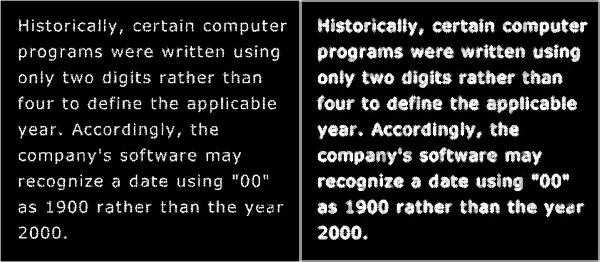

In [4]:
def dilasi(img, se):
    # Mendapatkan ukuran citra dan Structuring Element Dilasi
    height, width = img.shape[:2]
    se_height, se_width = se.shape[:2]
    se_center_y, se_center_x = se_height // 2, se_width // 2
    
    # Membuat citra output yang sama ukurannya dengan citra input
    output = np.zeros((height, width), dtype=np.uint8)
    
    # Melakukan dilasi pada setiap piksel di citra input
    for y in range(height):
        for x in range(width):
            # Memeriksa setiap piksel pada Structuring Element Dilasi
            max_val = 0
            for j in range(se_height):
                for i in range(se_width):
                    if se[j][i] != 0:
                        # Menghitung koordinat piksel pada citra input
                        input_y = y + (j - se_center_y)
                        input_x = x + (i - se_center_x)
                        # Memeriksa apakah koordinat piksel berada di dalam citra
                        if input_y >= 0 and input_y < height and input_x >= 0 and input_x < width:
                            # Memeriksa apakah nilai piksel lebih besar dari sebelumnya
                            if img[input_y][input_x] > max_val:
                                max_val = img[input_y][input_x]
            # Menetapkan nilai maksimum ke piksel pada citra output
            output[y][x] = max_val
    
    return output

# Menentukan Structuring Element Dilasi berbentuk cross 3 x 3
se = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]], dtype=np.uint8)

# Melakukan dilasi pada citra menggunakan Structuring Element Dilasi yang telah ditentukan
output = dilasi(img, se)

final_frame = cv.hconcat((img, output))
cv2_imshow(final_frame)

## Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV.

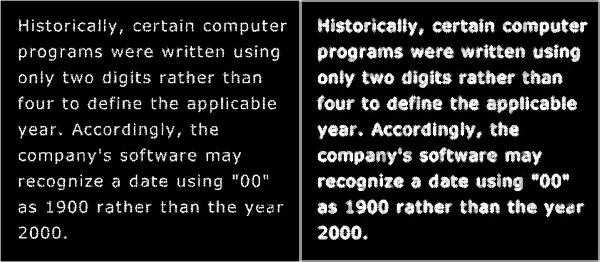

In [16]:
se = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
output2 = cv.dilate(img, se)

final_frame2 = cv.hconcat((img, output2))
cv2_imshow(final_frame2)

## Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV.

In [13]:
# Membaca citra
img_erosi= cv.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv.IMREAD_GRAYSCALE)

In [20]:
m,n= img_erosi.shape 
k=5
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2
result_erosi= np.zeros((m,n), dtype=np.uint8)
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img_erosi[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    result_erosi[i,j]= np.min(product)

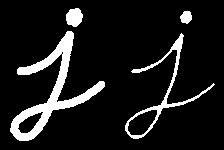

In [21]:
final_frame3 = cv.hconcat((img_erosi, result_erosi))
cv2_imshow(final_frame3)

## Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV.

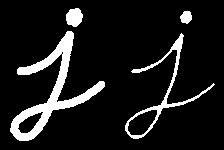

In [22]:
kernel = np.ones((5, 5), np.uint8)
rslt_erosi2 = cv.erode(img_erosi, kernel, iterations=1)

final_frame4 = cv.hconcat((img_erosi, rslt_erosi2))
cv2_imshow(final_frame4)

## Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV.

In [34]:
img_fing= cv.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

### Tanpa Library

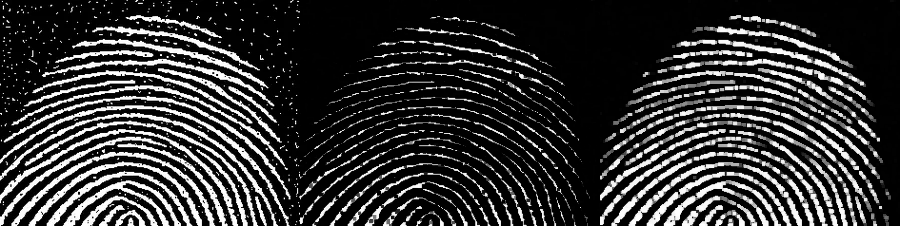

In [39]:
# Membuat kernel square 3x3
kernel = np.ones((3,3), np.uint8)

# Melakukan operasi erosi
erosi_img = cv.erode(img_fing, kernel)

# Melakukan operasi dilasi
dilation_img = cv.dilate(erosi_img, kernel)

opening_img = dilation_img

final_frame5 = cv.hconcat((img_fing, erosi_img, opening_img))
cv2_imshow(final_frame5)

### Dengan Library

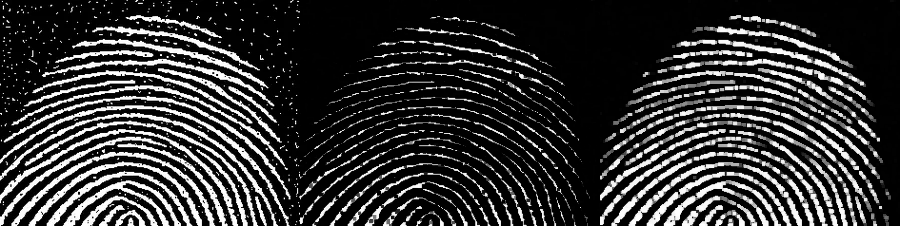

In [40]:
# Membuat kernel square 3x3
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

# Melakukan operasi opening
opening_img = cv.morphologyEx(img_fing, cv.MORPH_OPEN, kernel)

final_frame6 = cv.hconcat((img_fing, erosi_img, opening_img))
cv2_imshow(final_frame6)

## Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV.

### Tanpa Library

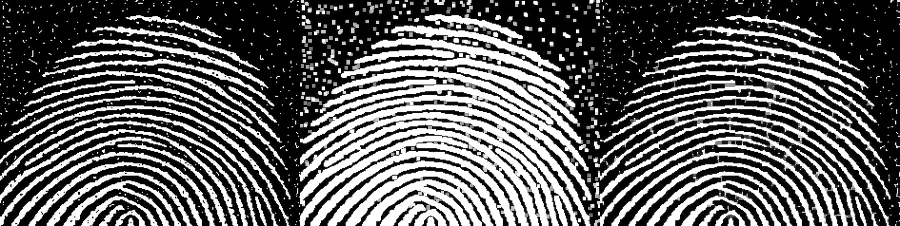

In [41]:
# Membuat kernel square 3x3
kernel = np.ones((3,3), np.uint8)

# Melakukan operasi dilasi
dilation_img2 = cv.dilate(img_fing, kernel)

# Melakukan operasi erosi
erosion_img2 = cv.erode(dilation_img2, kernel)

# Menampilkan gambar hasil closing
closing_img = erosion_img2

final_frame7 = cv.hconcat((img_fing, dilation_img2, closing_img))
cv2_imshow(final_frame7)

### Dengan Library

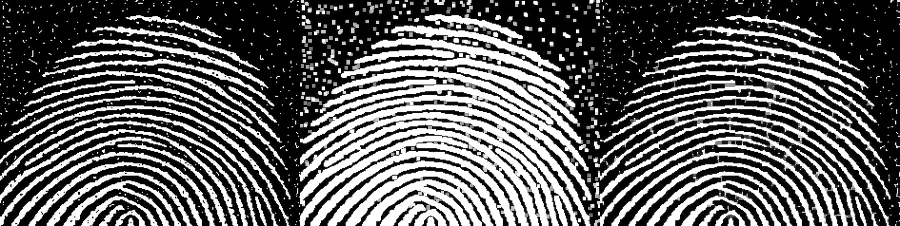

In [42]:
# Membuat kernel square 3x3
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

# Melakukan operasi closing
closing_img2 = cv.morphologyEx(img_fing, cv.MORPH_CLOSE, kernel)

final_frame8 = cv.hconcat((img_fing, dilation_img2, closing_img2))
cv2_imshow(final_frame8)

## Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5.

In [43]:
img_j= cv.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv.IMREAD_GRAYSCALE)

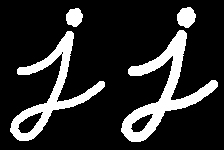

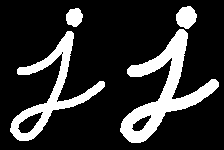

In [50]:
kernel_cross_3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)

# Membuat kernel cross 5x5
kernel_cross_5 = np.array([[0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [1, 1, 1, 1, 1],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0]], np.uint8)

# Melakukan operasi dilasi dengan kernel cross 3x3
dilation_img_cross_3 = cv.dilate(img_j, kernel_cross_3)

# Melakukan operasi dilasi dengan kernel cross 5x5
dilation_img_cross_5 = cv.dilate(img_j, kernel_cross_5)

# Menampilkan gambar hasil dilasi
final_frame9 = cv.hconcat((img_j, dilation_img_cross_3))
cv2_imshow(final_frame9)

final_frame10 = cv.hconcat((img_j, dilation_img_cross_5))
cv2_imshow(final_frame10)

## Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5.

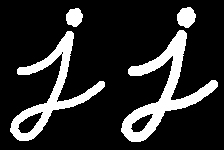

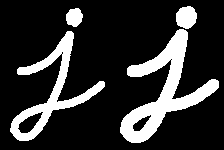

In [51]:
# Membuat kernel circular 3x3
kernel_circular_3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

# Membuat kernel circular 5x5
kernel_circular_5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Melakukan operasi dilasi dengan kernel circular 3x3
dilation_img_circular_3 = cv.dilate(img_j, kernel_circular_3)

# Melakukan operasi dilasi dengan kernel circular 5x5
dilation_img_circular_5 = cv.dilate(img_j, kernel_circular_5)

final_frame11 = cv.hconcat((img_j, dilation_img_circular_3))
cv2_imshow(final_frame11)

final_frame12 = cv.hconcat((img_j, dilation_img_circular_5))
cv2_imshow(final_frame12)

## Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7.

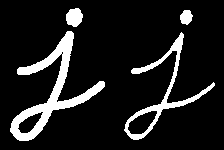

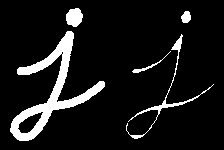

In [52]:
# Membuat kernel rectangle 3x5
kernel_rect_3_5 = np.ones((3, 5), np.uint8)

# Membuat kernel rectangle 5x7
kernel_rect_5_7 = np.ones((5, 7), np.uint8)

# Melakukan operasi erosi dengan kernel rectangle 3x5
erosion_img_rect_3_5 = cv.erode(img_j, kernel_rect_3_5)

# Melakukan operasi erosi dengan kernel rectangle 5x7
erosion_img_rect_5_7 = cv.erode(img_j, kernel_rect_5_7)

final_frame13 = cv.hconcat((img_j, erosion_img_rect_3_5))
cv2_imshow(final_frame13)

final_frame14 = cv.hconcat((img_j, erosion_img_rect_5_7))
cv2_imshow(final_frame14)

## Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5.

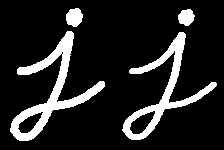

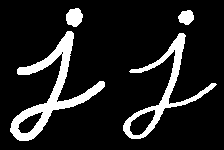

In [53]:
# Membuat kernel line vertikal 3
kernel_line_vert_3 = np.ones((3, 1), np.uint8)

# Membuat kernel line vertikal 5
kernel_line_vert_5 = np.ones((5, 1), np.uint8)

# Melakukan operasi erosi dengan kernel line vertikal 3
erosion_img_line_vert_3 = cv.erode(img_j, kernel_line_vert_3)

# Melakukan operasi erosi dengan kernel line vertikal 5
erosion_img_line_vert_5 = cv.erode(img_j, kernel_line_vert_5)

final_frame15 = cv.hconcat((img_j, erosion_img_line_vert_3))
cv2_imshow(final_frame15)

final_frame16 = cv.hconcat((img_j, erosion_img_line_vert_5))
cv2_imshow(final_frame16)